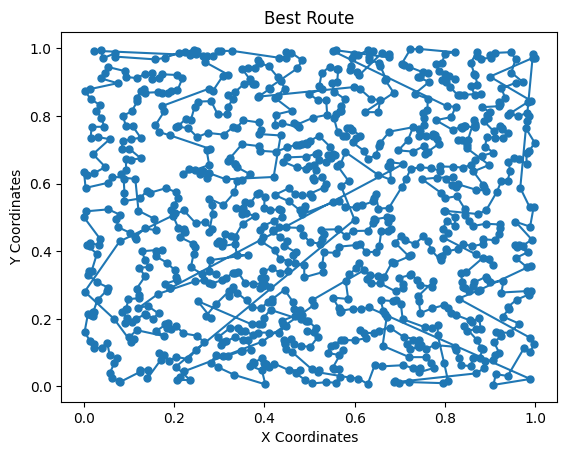

Best Route: [367, 614, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 335, 653, 727, 535, 470, 680, 167, 413, 369, 250, 704, 717, 159, 26, 74, 500, 508, 786, 241, 35, 791, 381, 490, 825, 992, 16, 646, 876, 377, 34, 937, 670, 637, 233, 866, 939, 93, 824, 376, 770, 691, 53, 729, 267, 160, 346, 340, 759, 775, 450, 48, 593, 999, 943, 29, 783, 444, 794, 471, 975, 486, 456, 489, 140, 712, 611, 323, 530, 743, 613, 343, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 223, 852, 777, 412, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496, 76, 755, 455, 380, 225, 288, 571, 497, 457, 17, 559, 821, 

In [6]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Nearest neighbor algorithm for generating an initial route
def nearest_neighbor_initial_route():
    current_city = random.randint(0, num_cities - 1)  # Start from a random city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    route.append(route[0])  # Return to the starting city
    return route
# Calculate the total distance of a route (including return to start)
def total_distance(route):
    total = 0
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[i+1]])
    return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
    current_route = initial_route()
    best_route = current_route
    temp = initial_temp

    for i in range(num_iterations):
        new_route = current_route.copy()
        # Perform a random swap of two cities
        index1, index2 = random.sample(range(num_cities), 2)
        new_route[index1], new_route[index2] = new_route[index2], new_route[index1]

        current_energy = total_distance(current_route)
        new_energy = total_distance(new_route)

        # Acceptance probability
        if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
            current_route = new_route

        # Update best route
        if total_distance(current_route) < total_distance(best_route):
            best_route = current_route

        # Cool the temperature
        temp *= cooling_rate

    return best_route

# Set initial parameters
initial_temp=60000
cooling_rate=0.99
num_iterations=30

# Find the best route using Simulated Annealing with nearest neighbor initial route
best_route = simulated_annealing(nearest_neighbor_initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)
#28.1

In [ ]:

route_length = len(best_route)
print("Length of the route:", route_length)


Length of the route: 1001
